# Trabajo práctico integrador

**Nombre**: Santiago Esteva

## Primera Parte (Clase 1 y 2)

In [48]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import time
import itertools
import random

from tqdm import tqdm_notebook

# %matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split

RANDOM_STATE = 17

C:\Users\sesteva\AppData\Local\Temp\ipykernel_12744\1299955388.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-darkgrid'])


### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [49]:
def vector_norm_l0(matrix):
    mask = matrix > 0
    return np.sum(mask, axis=1)


def vector_norm_l1(matrix):
    abs_m = np.abs(matrix)
    return np.sum(abs_m, axis=1)


def vector_norm_l2(matrix):
    return np.sqrt(np.sum(matrix ** 2, axis=1))


def vector_norm_inf(m):
    return np.max(np.abs(m), axis=1)


def normas(x):
    """
    Calcula las normas l0, l1, l2, linf de una matriz x dada.
    """
    # Norma l0
    norma_l0 = vector_norm_l0(x)
    
    # Norma l1
    norma_l1 = vector_norm_l1(x)
    
    # Norma l2
    norma_l2 = vector_norm_l2(x)
    
    # Norma linf
    norma_linf = vector_norm_inf(x)
    
    return norma_l0, norma_l1, norma_l2, norma_linf

x = np.array([[1, 2, 3], [4, 5, 6], [0, 0, 0], [-1, -2, -3]])
norma_l0, norma_l1, norma_l2, norma_linf = normas(x)

print("Result Norma l0:", norma_l0)
print('Result using np.linalg.norm: ' + str(np.linalg.norm(x,0,axis=1)))
print("Result Norma l1:", norma_l1)
print('Result using np.linalg.norm: ' + str(np.linalg.norm(x,1,axis=1)))
print("Result Norma l2:", norma_l2)
print('Result using np.linalg.norm: ' + str(np.linalg.norm(x,2,axis=1)))
print("Result Norma linf:", norma_linf)
print('Result using np.linalg.norm: ' + str(np.linalg.norm(x,np.inf,axis=1)))

Result Norma l0: [3 3 0 0]
Result using np.linalg.norm: [3. 3. 0. 3.]
Result Norma l1: [ 6 15  0  6]
Result using np.linalg.norm: [ 6. 15.  0.  6.]
Result Norma l2: [3.74165739 8.77496439 0.         3.74165739]
Result using np.linalg.norm: [3.74165739 8.77496439 0.         3.74165739]
Result Norma linf: [3 6 0 3]
Result using np.linalg.norm: [3. 6. 0. 3.]


### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [50]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

print(truth)
print(prediction)

[1 1 0 1 1 1 0 0 0 1]
[1 1 1 1 0 0 1 1 0 0]


In [51]:
# True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
TP = 0
# True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
TN = 0
# False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
FP = 0
# False Negative (FN): El valor verdadero es 1 y el valor predicho es 0
FN = 0

for i in np.arange(0, truth.size, 1):
  if truth[i] == 1 and prediction[i] == 1:
    TP = TP+1
  elif truth[i] == 0 and prediction[i] == 0:
    TN = TN+1
  elif truth[i] == 0 and prediction[i] == 1:
    FP = FP+1
  elif truth[i] == 1 and prediction[i] == 0:
    FN = FN+1

# Precision = TP / (TP + FP)
Precision = TP/(TP+FP)
# Recall = TP / (TP + FN)
Recall = TP/(TP+FN)
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy = (TP+TN)/(TP+TN+FP+FN)

print('Result with numpy: ')
print('Precision score: ' + str(Precision))
print('Recall score: ' + str(Recall))
print('Accuracy score: ' + str(Accuracy))

# Comparamos con la librería sklearn.metrics
import sklearn.metrics as skmet

print('Result with sklearn.metrics:')
precision_skl = skmet.precision_score(truth, prediction)
print('Precision score: ' + str(precision_skl))
recall_skl = skmet.recall_score(truth, prediction)
print('Recall score: ' + str(recall_skl))
accuracy_skl = skmet.accuracy_score(truth, prediction)
print('Accuracy score: ' + str(accuracy_skl))

Result with numpy: 
Precision score: 0.5
Recall score: 0.5
Accuracy score: 0.4
Result with sklearn.metrics:
Precision score: 0.5
Recall score: 0.5
Accuracy score: 0.4


### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

#### Human Activity Recognition Using Smartphones

El dataset ubicado en [HAR_Dataset](tp_integrador_enunciado\data\HAR_Dataset) cuenta con :

* 6 actividades listadas en [activity_labels](clase_5\jupyterbooks\data\HAR_Dataset\activity_labels.txt) : [WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING]

* Data: 70% training, 30% test

* Sensores : acelerómetro y giróscopo 
* Aceleración 3D (acelerómetro) y aceleración estimada del cuerpo
* Velocidad angular 3D (giróscopo)
* 561-feature vector con info temporal (prefijo 't') y frecuencial (prefijo 'f'). Las features están normalizadas y acotadas en el rango [-1; 1]
* Label
* Identificador de la actividad que se está realizando

Video del experimento: [www.youtube.com/watch?v=XOEN9W05_4A](www.youtube.com/watch?v=XOEN9W05_4A)

In [52]:
# Cargo el dataset:
PATH_DATASET = ".\data\HAR_Dataset\\train"
x_train = np.loadtxt(os.path.join(PATH_DATASET, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DATASET, "Y_train.txt"))

PATH_DATASET = ".\data\HAR_Dataset\\test"
x_test = np.loadtxt(os.path.join(PATH_DATASET, "X_test.txt"))
y_test = np.loadtxt(os.path.join(PATH_DATASET, "Y_test.txt"))

# Imprimo las dimensiones:
print('Shape of df_train: ' + str(x_train.shape))
print('Shape of y_train: ' + str(y_train.shape))
print('Shape of df_test: ' + str(x_test.shape))
print('Shape of y_test: ' + str(y_test.shape))

Shape of df_train: (7352, 561)
Shape of y_train: (7352,)
Shape of df_test: (2947, 561)
Shape of y_test: (2947,)


In [53]:
df_train = pd.DataFrame(data=x_train)
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [54]:
df_test = pd.DataFrame(data=x_test)
df_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,0.130236,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.231018,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-0.785543,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.008433,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,0.142676,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,0.288320,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113


##### HAR - Principal Component Analysis (PCA)

In [55]:
# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)

In [56]:
pca = PCA(n_components=0.9, random_state=RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

# Cantidad de componentes necesarios
X_pca.shape[1]

63

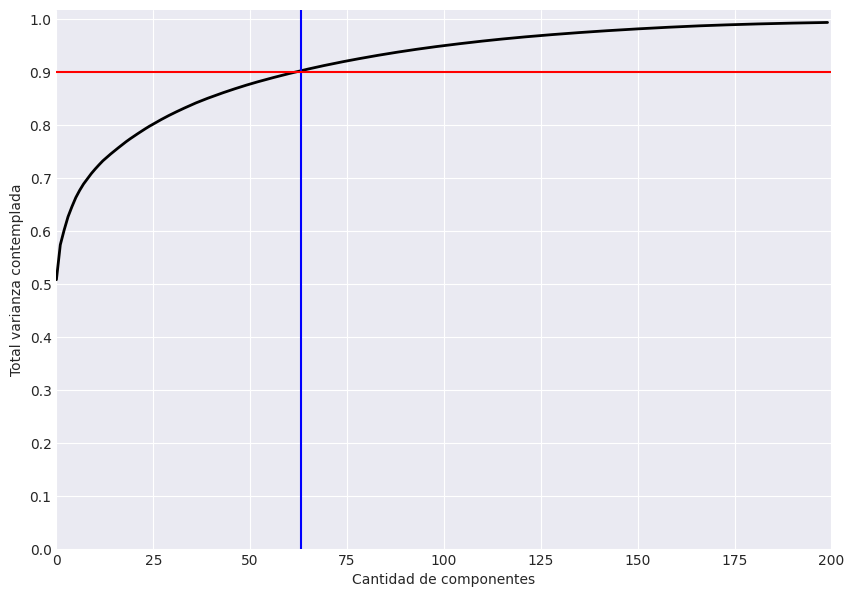

In [57]:
pca_2 = PCA(n_components=200, random_state=RANDOM_STATE).fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_2.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(63, c='b')
plt.axhline(0.9, c='r')
plt.show()

C:\Users\sesteva\AppData\Local\Temp\ipykernel_12744\2971930442.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_train, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))


Text(0.5, 1.0, 'HAR - PCA projection 2D')

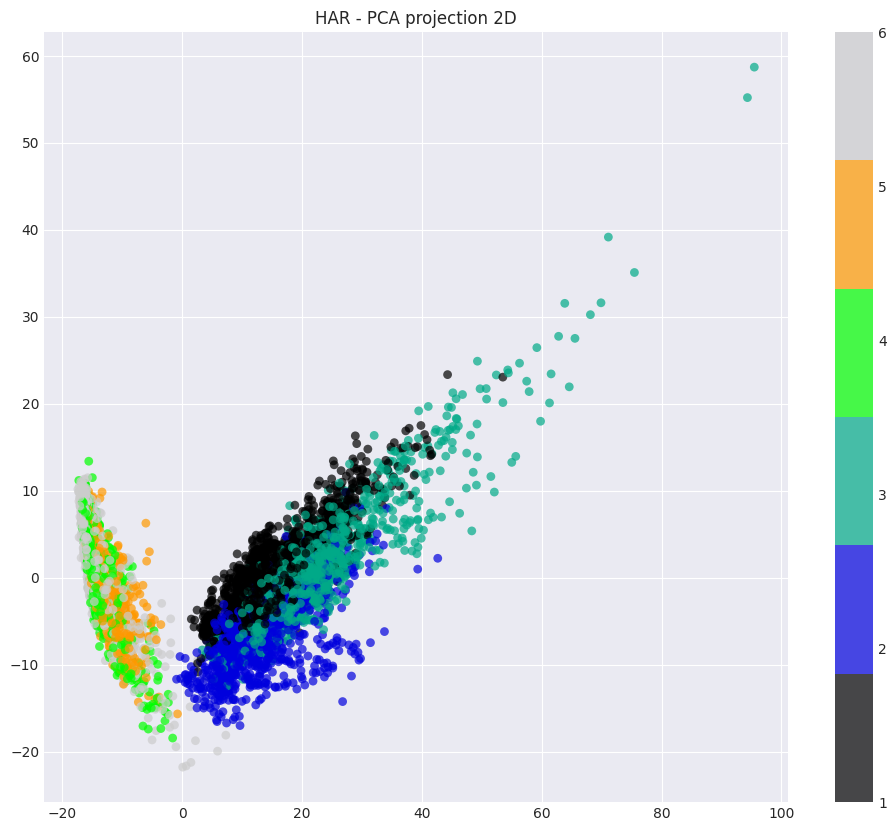

In [58]:
# Graficamos los primeros dos componentes
plt.figure(figsize=(12,10))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_train, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()

plt.title('HAR - PCA projection 2D')

##### HAR - Clusterización

In [59]:
n_clases = 6
kmeans = KMeans(n_clusters=n_clases, n_init=100, random_state=RANDOM_STATE)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

C:\Users\sesteva\AppData\Local\Temp\ipykernel_12744\4100875422.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))


Text(0.5, 1.0, 'HAR - PCA projection 2D')

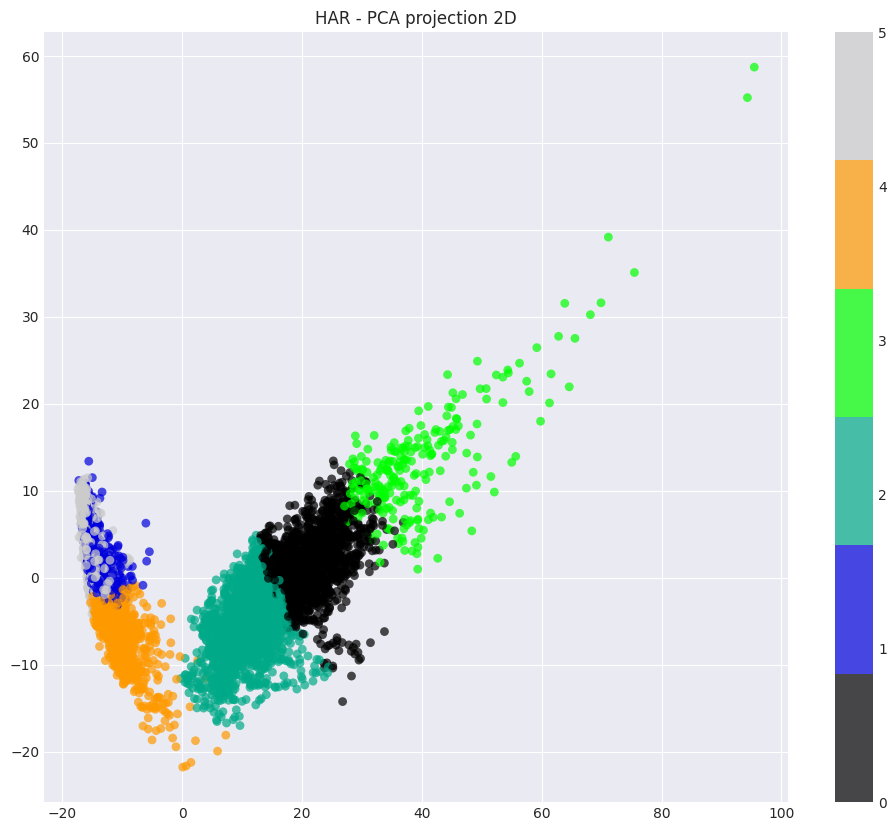

In [60]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.colorbar()
plt.title('HAR - PCA projection 2D')

In [61]:
kmeans_move = KMeans(n_clusters=2, n_init=100, random_state=RANDOM_STATE)
kmeans_move.fit(X_pca)
cluster_labels_mov = kmeans_move.labels_

C:\Users\sesteva\AppData\Local\Temp\ipykernel_12744\1570231077.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))


Text(0.5, 1.0, 'HAR - PCA projection 2D')

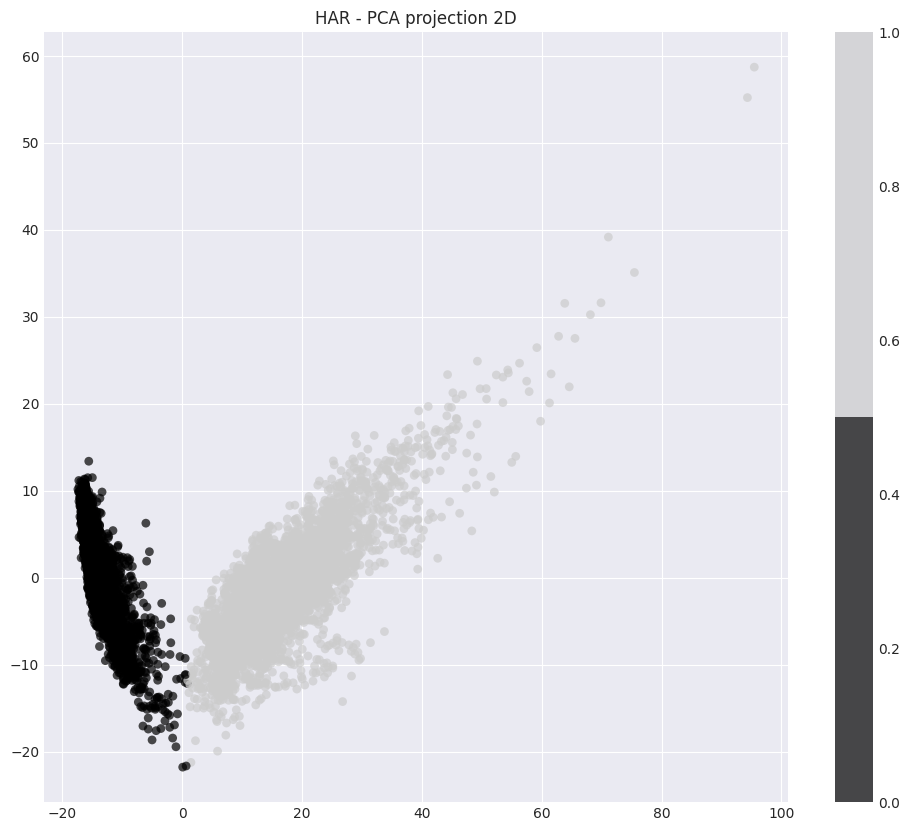

In [62]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_mov, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.colorbar()
plt.title('HAR - PCA projection 2D')

In [63]:
tab = pd.crosstab(y_train, cluster_labels, margins=True)
tab.index = ['Caminar', 'Subir escaleras', 'Bajar escaleras', 'Estar parado', 'Estar sentado', 'Recostarse', 'Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(6)] + ['Todos']
tab

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,Todos
Caminar,512,0,646,68,0,0,1226
Subir escaleras,210,0,856,5,2,0,1073
Bajar escaleras,620,0,200,166,0,0,986
Estar parado,0,884,1,0,315,86,1286
Estar sentado,0,999,0,0,375,0,1374
Recostarse,0,26,4,0,270,1107,1407
Todos,1342,1909,1707,239,962,1193,7352


In [64]:
tab = pd.crosstab(y_train, cluster_labels_mov, margins=True)
tab.index = ['Caminar', 'Subir escaleras', 'Bajar escaleras', 'Estar parado', 'Estar sentado', 'Recostarse', 'Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(2)] + ['Todos']
tab

,cluster 0,cluster 1,Todos
Caminar,0,1226,1226
Subir escaleras,8,1065,1073
Bajar escaleras,0,986,986
Estar parado,1285,1,1286
Estar sentado,1374,0,1374
Recostarse,1396,11,1407
Todos,4063,3289,7352


#### MNIST

Formato del dataset: (1797, 64)
Formato de las etiquetas: (1797,)
[0 1 2 3 4 5 6 7 8 9]


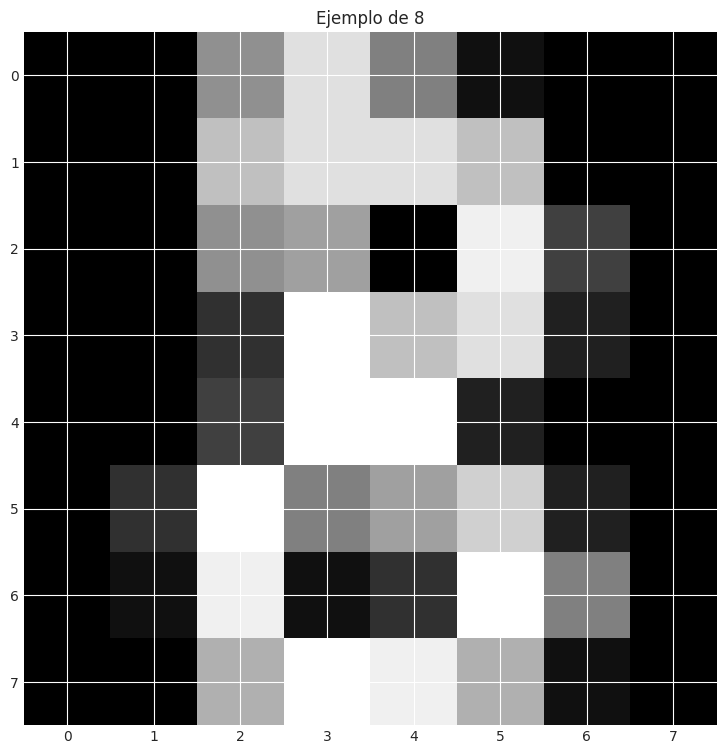

In [65]:
# Cargamos los datos
X, y = load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(X.shape))

print('Formato de las etiquetas: {}'.format(y.shape))

clases = np.unique(y)
print(clases)

# Cargamo una muestra
plt.grid(True)
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(X[8, :].reshape((8, 8)), cmap='gray')
plt.show()

##### MNIST - Principal Component Analysis (PCA)

In [66]:
# Estandarizo SÓLO LOS INPUTS (elimina la media y escala):
scaler = StandardScaler() # Standardize features by removing the mean and scaling to unit variance.
X_scaled = scaler.fit_transform(X)

In [67]:
# Hago un PCA y pido que devuelva un 80% de la varianza explicada
pca = PCA(n_components=0.8).fit(X_scaled)
X_pca = pca.transform(X_scaled)

print('Dimensions in X_pca_mnist: ' +str(X_pca.shape))

Dimensions in X_pca_mnist: (1797, 21)


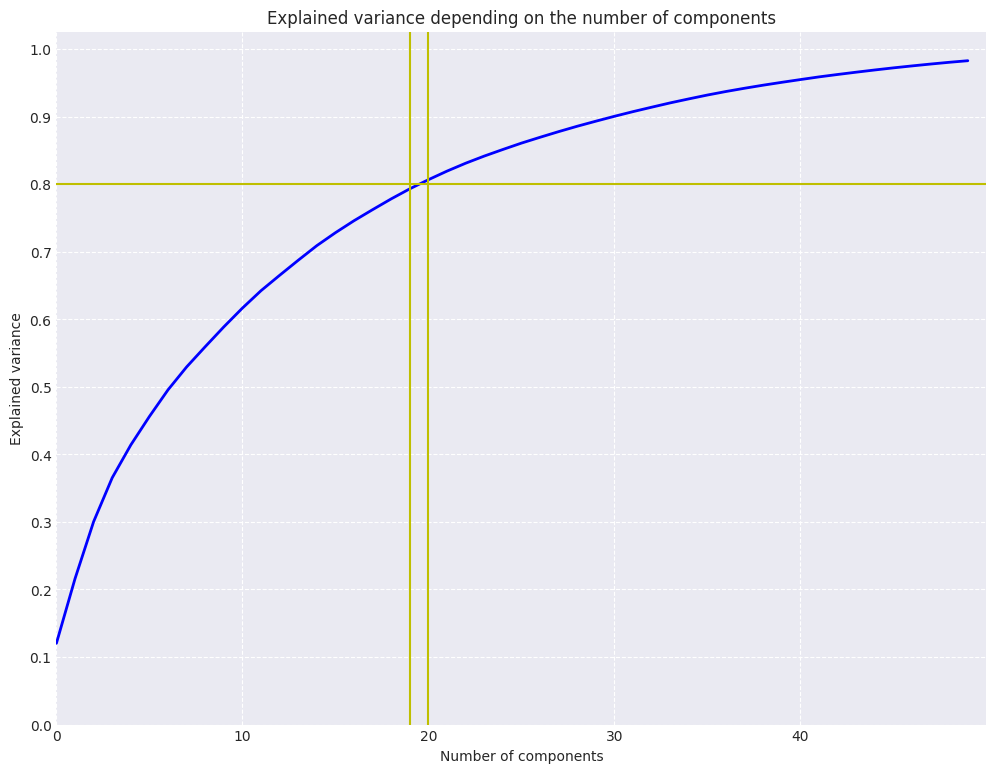

In [68]:
# Es decir, con 21 dimensiones alcanzo (un poquito más de) el 80% de varianza explicada

# Grafico para distinta cantidad de componentes

pca_ncomp = PCA(n_components = 50).fit(X_scaled)

plt.figure()
plt.plot(np.cumsum(pca_ncomp.explained_variance_ratio_), color='b', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Explained variance depending on the number of components')
plt.xlim(0,50)
plt.yticks(np.arange(0,1.1,0.1))
plt.xticks(np.arange(0,50,10))
plt.grid(linestyle='--')

# Punto donde obtengo 0.8 de varianza:
plt.axvline(19, c='y')
plt.axvline(20, c='y')
plt.axhline(0.8, c='y')
plt.show()

C:\Users\sesteva\AppData\Local\Temp\ipykernel_12744\3289586102.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:,0], X_pca[:,1], c=y, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))


Text(0, 0.5, 'Second Principal Component')

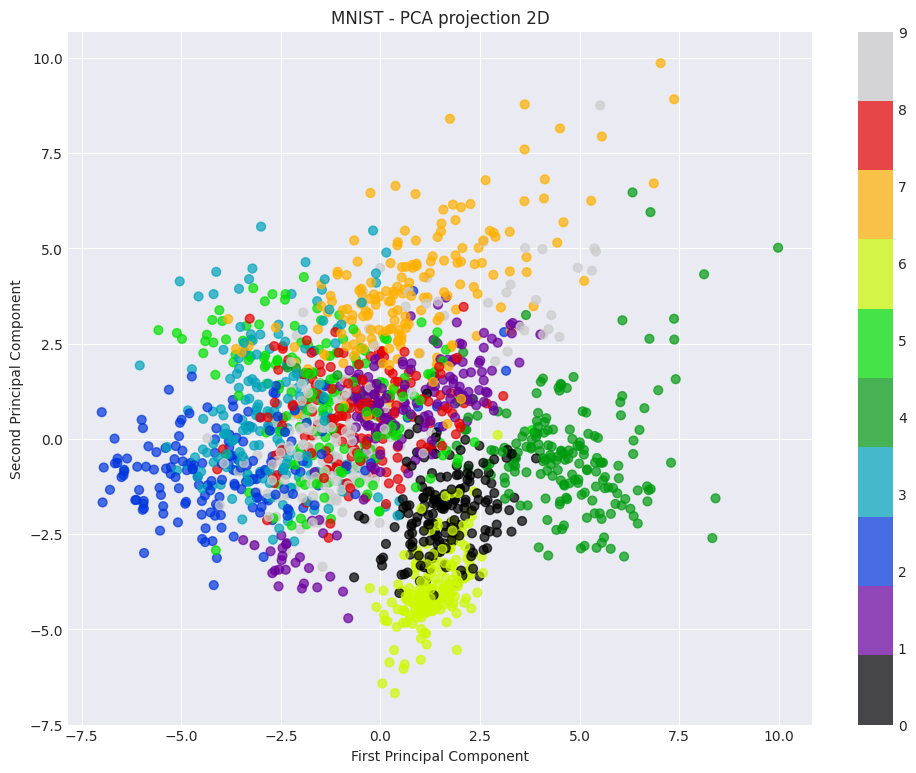

In [69]:
# Grafico las primeras 2 componentes principales
# De los datos de PCA agarro:
##  X_pca_mnist[:, 0]: columna 1
##  X_pca_mnist[:, 1]: columna 2
##  c = y_train_mnist: pinto los datos según lo que dice la columna de output (y_train_mnist)
##  nipy_spectral: para que tenga el mapa de colores
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.rcParams['axes.grid'] = False # Evita un warning
plt.colorbar()
plt.title('MNIST - PCA projection 2D')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

C:\Users\sesteva\AppData\Local\Temp\ipykernel_12744\622449232.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  fig3d.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))


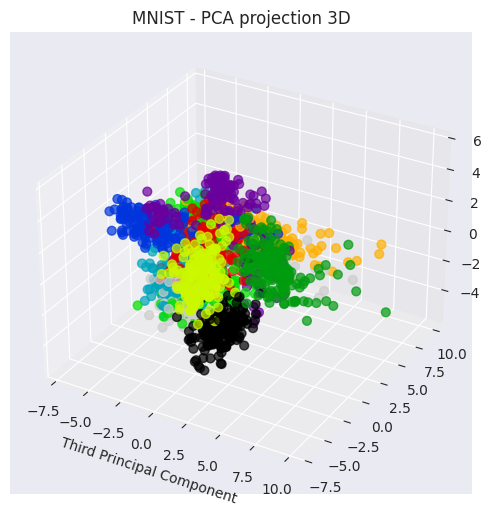

In [70]:
# Grafico las primeras 3 componentes principales para ver si la altura me da un poco más de claridad
# De los datos de PCA agarro:
##  X_pca_mnist[:, 0]: columna 1
##  X_pca_mnist[:, 1]: columna 2
##  X_pca_mnist[:, 2]: columna 3
##  c = y_train_mnist: pinto los datos según lo que dice la columna de output (y_train_mnist)
##  nipy_spectral: para que tenga el mapa de colores
fig = plt.figure(figsize=(14,6))
fig3d = fig.add_subplot(projection='3d')
fig3d.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))

fig3d = plt.title('MNIST - PCA projection 3D')
fig3d = plt.xlabel('First Principal Component')
fig3d = plt.xlabel('Second Principal Component')
fig3d = plt.xlabel('Third Principal Component')

##### MNIST - CLuster

In [71]:
# Para n_clusters=10 (es decir, los 10 dígitos posibles del 0 al 9):
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_pca)
cluster_labels_10clusters = kmeans.labels_

# Puedo imprimir el centroide con:
#print (kmeans.cluster_centers_)

# Para n_clusters=2:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca)
cluster_labels_2clusters = kmeans.labels_
# Puedo imprimir el centroide con:
print('Centers when using 2 clusters')
print ('Cluster 1 center: (' + str(kmeans.cluster_centers_[0,0]) + '),(' + str(kmeans.cluster_centers_[0,1]) + ')')
print ('Cluster 2 center: (' + str(kmeans.cluster_centers_[1,0]) + '),(' + str(kmeans.cluster_centers_[1,1]) + ')')

c:\Users\sesteva\Documents\GitHub\SEintro_ia\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sesteva\Documents\GitHub\SEintro_ia\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centers when using 2 clusters
Cluster 1 center: (2.590071461219775),(-1.7249734473527751)
Cluster 2 center: (-1.2788881529214857),(0.8517325251268074)


C:\Users\sesteva\AppData\Local\Temp\ipykernel_12744\3791730779.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels_10clusters, cmap=plt.cm.get_cmap('nipy_spectral', 10))
C:\Users\sesteva\AppData\Local\Temp\ipykernel_12744\3791730779.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels_2clusters, cmap=plt.cm.get_cmap('nipy_spectral', 2))


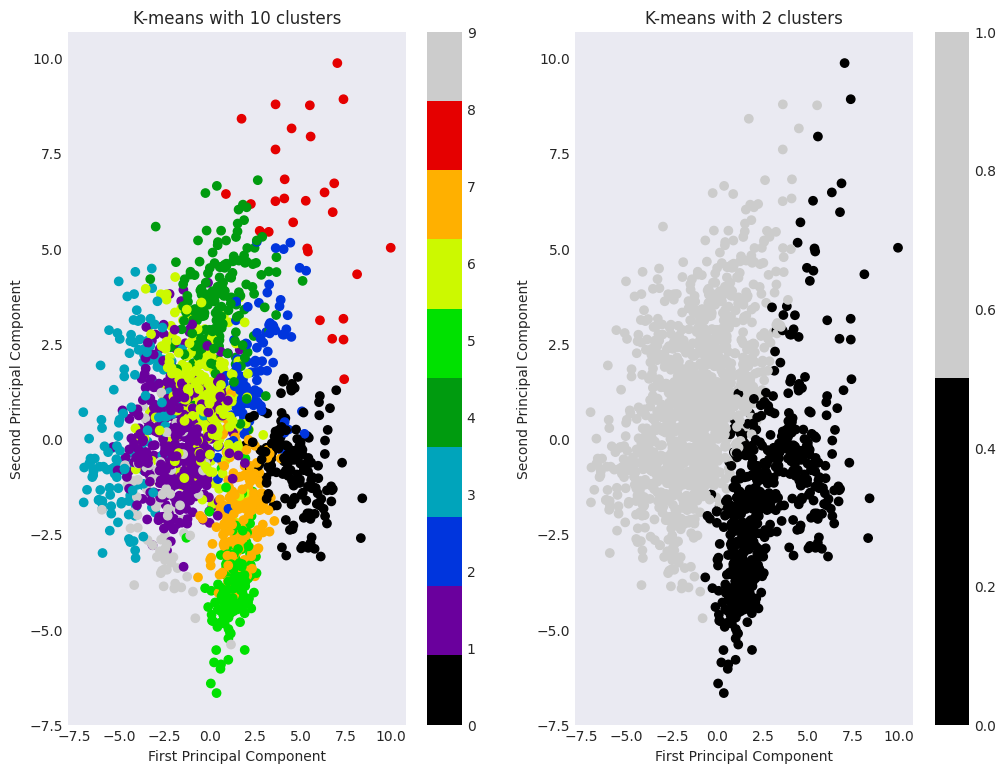

In [72]:
# Grafico los 2 primeros componentes

## 10 clusters:
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels_10clusters, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('K-means with 10 clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
#plt.show()

## 2 clusters:
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels_2clusters, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('K-means with 2 clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

## Segunda Parte (Clase 3 y 4)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [74]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [75]:
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


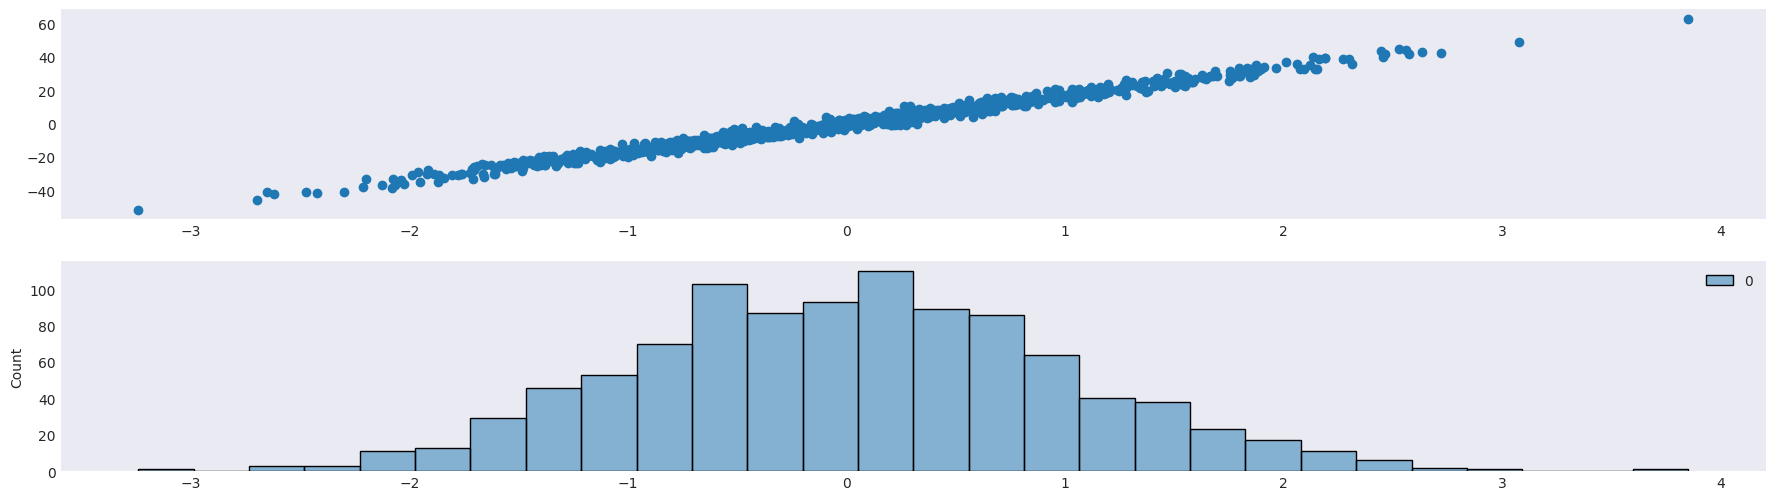

In [76]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [77]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [78]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

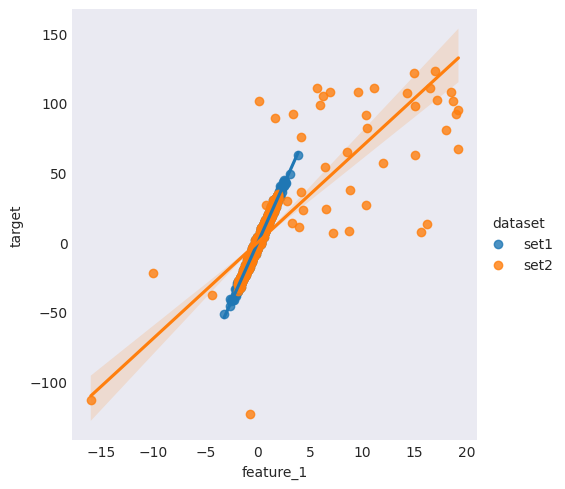

In [79]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

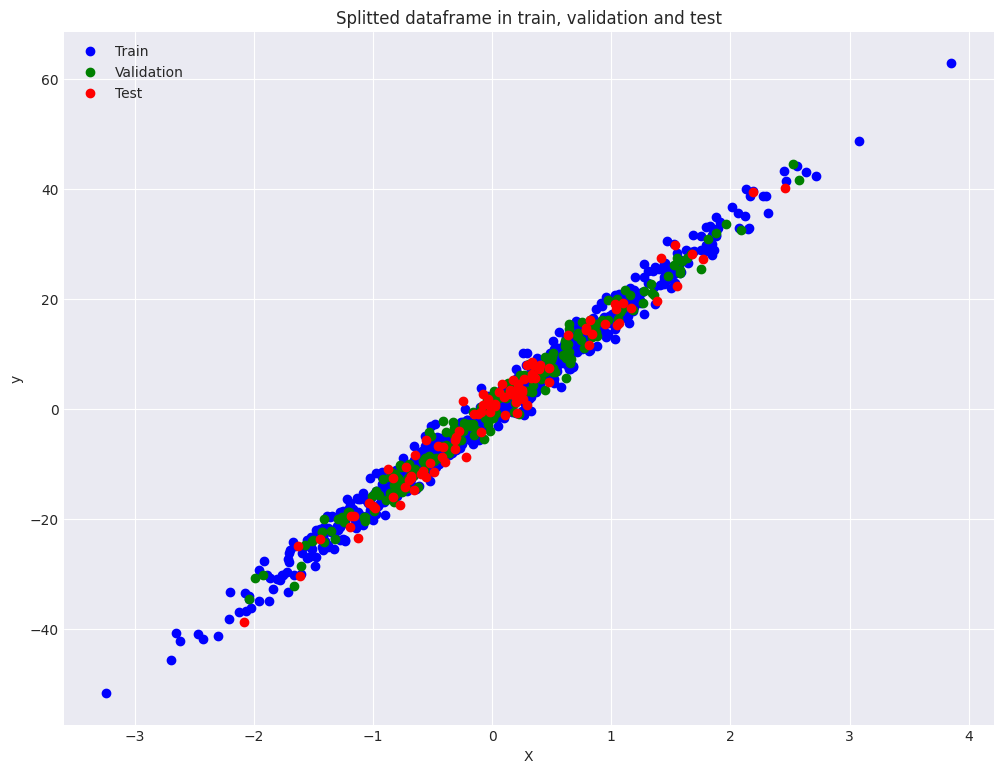

In [80]:
def split(df: pd.DataFrame, train_size: float, validation_size: float, test_size: float):
    i = 0
    i_initial = 0
    i_final = len(X)

    X_train = np.array([])
    x_val = np.array([])
    X_test = np.array([])

    y_train = np.array([])
    y_val = np.array([])
    y_test = np.array([])


    # Calculo la cantidad de valores que hay para train, validation y test
    n_train = round((i_final-i_initial)*train_size)
    n_val = round((i_final-i_initial)*validation_size)
    n_test = round((i_final-i_initial)*test_size)    

    # Desordeno el array dentro del subarray y agarro en orden
    arr = np.arange(i_initial, i_final, 1)
    np.random.shuffle(arr)
    chosen_idx_train = arr[0:n_train]
    chosen_idx_validation = arr[n_train:n_train+n_val]
    chosen_idx_test = arr[n_train+n_val:n_train+n_val+n_test]

    for j in chosen_idx_train:
      X_train = np.append(X_train, df.feature_1[j])
      y_train = np.append(y_train, df.target[j])

    for j in chosen_idx_validation:
      x_val = np.append(x_val, df.feature_1[j])
      y_val = np.append(y_val, df.target[j])

    for j in chosen_idx_test:
      X_test = np.append(X_test, df.feature_1[j])
      y_test = np.append(y_test, df.target[j])
    
    return X_train, x_val, X_test, y_train, y_val, y_test


X_train, x_val, X_test, y_train, y_val, y_test = split(df, 0.7, 0.2, 0.1)

plt.scatter(X_train, y_train, c='b')
plt.scatter(x_val, y_val, c='g')
plt.scatter(X_test, y_test, c='r')
plt.title('Splitted dataframe in train, validation and test')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['Train','Validation','Test'])
plt.grid()

### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generar datasets:
    - Uno normal con poco `noise` y pocos outliers
    - Uno con mucho `noise` y pocos outliers
    - Uno con poco `noise` y muchos outliers
    - Uno con mucho `noise` y muchos outliers
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Comparar y analizar resultados.

In [81]:
# Creamos un dataset de prueba
## Utilicen mas `n_features` > 1 y n_informative mas o menos la mitad de n_features
X, y = make_regression(n_samples = 1000,
                       n_features = 10,
                       noise = 100,
                       n_informative = 5,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)

df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.123429,-1.253402,0.370340,0.101788,0.092628,-0.589254,0.306348,-1.458213,1.630130,1.242863,-44.755165
1,-0.216827,0.214983,-0.028817,-1.701140,0.264482,0.314972,0.374062,-0.292758,0.501900,0.063702,-16.218565
2,0.388979,1.655407,-0.755792,-1.161784,-0.300860,1.048707,-0.283139,0.251474,-0.194269,-1.209477,-9.541669
3,0.219072,-0.251552,-1.095871,-0.806520,-0.435139,2.768374,1.677201,-0.475392,-0.835870,-1.314879,94.835887
4,0.715734,0.383168,-0.686715,-1.236136,0.731001,1.623885,1.254338,2.394362,2.185095,0.538435,-161.502563


In [82]:
from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNetCV

In [83]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [84]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = False, two_tailed= True)

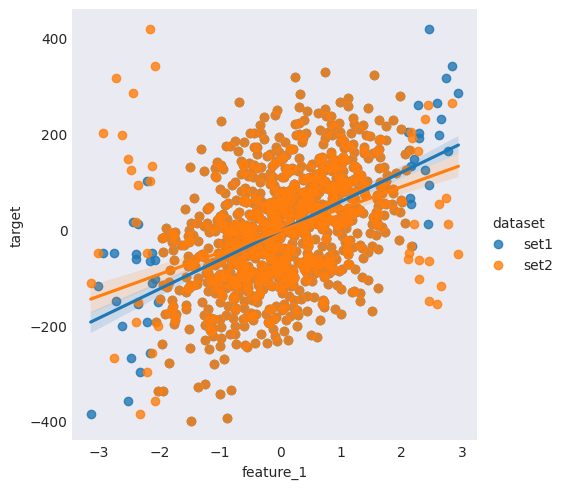

In [85]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')


## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`